In [1]:
import matplotlib.pyplot as plt

In [2]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading pipeline components...:  86%|████████▌ | 6/7 [00:41<00:04,  4.80s/it]/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Loading pipeline components...: 100%|██████████| 7/7 [00:41<00:00,  5.91s/it]


In [3]:
sd_pipeline = pipe

In [4]:
def get_completion_sd(prompt):
    negative_prompt="""
    simple background, duplicate, low quality, lowest quality,
    bad anatomy,bad proportions, extra digits, lowres, username,
    artist name, error, duplicate, watermark, signature, text,
    extra digit, fewer digit, worst quality, jpeg artifacts, blurry
    """
    return sd_pipeline(prompt,negative_prompt=negative_prompt).images[0]

In [5]:
prompt = """ hyperrealistic, baby llama"""

In [6]:
print(prompt)
sd_image = get_completion_sd(prompt)

 hyperrealistic, baby llama


100%|██████████| 50/50 [00:07<00:00,  6.59it/s]


[PROMPT]:   hyperrealistic, baby llama


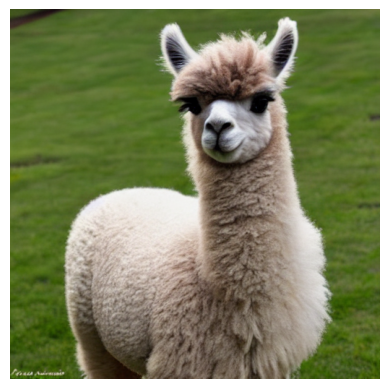

In [7]:
print("[PROMPT]: ",prompt)
plt.imshow(sd_image);
plt.axis('off');

In [8]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
from torch import autocast

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the model
pipe = StableDiffusionPipeline.from_pretrained(
    model_id, revision="fp16", torch_dtype=torch.float16, use_safetensors=False  # Change to False
)
pipe = pipe.to(device)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

def generate_image(prompt, num_images=4, guidance_scale=7.5):
    images = []
    for _ in range(num_images):
        with autocast(device_type=device):
            result = pipe(prompt, guidance_scale=guidance_scale)
            images.append(result["images"][0])
    return images

/opt/conda/lib/python3.10/site-packages/diffusers/pipelines/pipeline_loading_utils.py:219: FutureWarning: You are loading the variant fp16 from CompVis/stable-diffusion-v1-4 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]An error occurred while trying to fetch /home/ubuntu/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/ubuntu/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Loading pipeline components...:  14%|█▍        | 1/7 [00:01<00:06,  1.00s/it]An error occurred while trying to fetch /home/ubuntu/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/ubuntu/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Loading pipeline components...:  29%|██▊       | 2/7 [00:01<00:02,  1.78it/s]/opt/conda/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]
